In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'info-i-535-final-project-laxmi' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=info-i-535-final-project-laxmi:US:bquxjob_710a500c_18497f5437a)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_710a500c_18497f5437a') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke FROM `info-i-535-final-project-laxmi.heartstroke.heart-data`





# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:

# Running this code will read results from your previous job

job = client.get_job('bquxjob_710a500c_18497f5437a') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,10.0,0,0,False,children,Urban,63.08,20.5,smokes,0
1,Female,11.0,0,0,False,children,Rural,85.08,20.1,smokes,0
2,Female,12.0,0,0,False,children,Rural,207.45,25.4,smokes,0
3,Male,12.0,0,0,False,children,Urban,109.79,29.9,smokes,0
4,Female,12.0,0,0,False,children,Urban,95.99,20.8,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
30103,Female,79.0,1,0,True,Private,Rural,61.30,23.9,formerly smoked,0
30104,Female,79.0,0,1,False,Private,Rural,74.32,32.8,formerly smoked,0
30105,Female,79.0,0,0,True,Private,Urban,228.33,39.6,formerly smoked,0
30106,Male,79.0,1,0,True,Govt_job,Rural,98.00,22.7,formerly smoked,0



## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,30108.000000,30108.000000,30108.000000,30108,30108.000000,30108.000000,30108.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,True,NaN,NaN,NaN
freq,NaN,NaN,NaN,22551,NaN,NaN,NaN
mean,47.935100,0.117178,0.055733,NaN,107.188866,30.062379,0.021190
std,18.752146,0.321638,0.229409,NaN,45.963166,7.073867,0.144021
min,10.000000,0.000000,0.000000,NaN,55.010000,10.100000,0.000000
25%,33.000000,0.000000,0.000000,NaN,77.837500,25.100000,0.000000
50%,48.000000,0.000000,0.000000,NaN,92.395000,29.200000,0.000000
75%,62.000000,0.000000,0.000000,NaN,114.492500,33.600000,0.000000


## BigQuery Heart Stroke Data Visualization 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'People count')

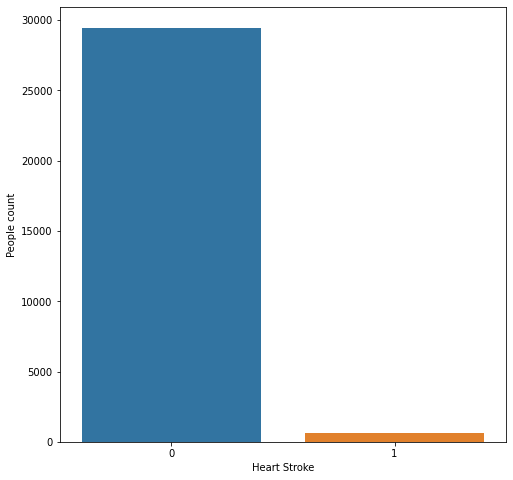

In [46]:
fig = plt.figure(figsize=(8,8))

sns.countplot(x='stroke',data=results)
plt.xlabel('Heart Stroke')
plt.ylabel('People count')

In [26]:
numeric_features = results.select_dtypes(include=['number'],exclude=['bool']).columns
for v in numeric_features:
  print(v ,":", results[v].unique())

age : [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 34. 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58.
 60. 62. 64. 68. 72. 76. 80. 65. 69. 73. 77. 81. 33. 35. 37. 39. 41. 43.
 45. 47. 49. 51. 53. 55. 57. 59. 61. 63. 66. 70. 74. 78. 82. 67. 71. 75.
 79.]
hypertension : <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
heart_disease : <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
avg_glucose_level : [ 63.08  85.08 207.45 ... 133.45 228.33 211.57]
bmi : [20.5 20.1 25.4 29.9 20.8 24.  33.9 22.9 30.4 19.6 22.2 30.8 25.2 24.9
 19.7 30.5 18.1 24.6 27.4 19.8 28.1 34.  25.6 23.5 20.  20.6 37.2 24.8
 35.6 23.2 25.5 22.8 22.5 27.5 23.  26.3 40.2 23.1 25.9 19.4 35.4 19.1
 21.8 21.7 30.6 21.1 23.7 33.5 32.9 21.  18.4 29.8 22.4 25.3 26.6 43.7
 22.7 19.9 38.4 32.  19.3 25.1 17.9 35.7 40.6 52.4 21.3 23.9 31.4 23.8
 29.  22.  30.3 28.5 21.2 30.  28.2 20.4 19.  31.6 41.1 37.4 28.6 18.5
 28.  35.9 28.9 34.9 26.7 35.2 20.9 21.5 26.9 27.3 28.8 26.  25.  23.3
 3

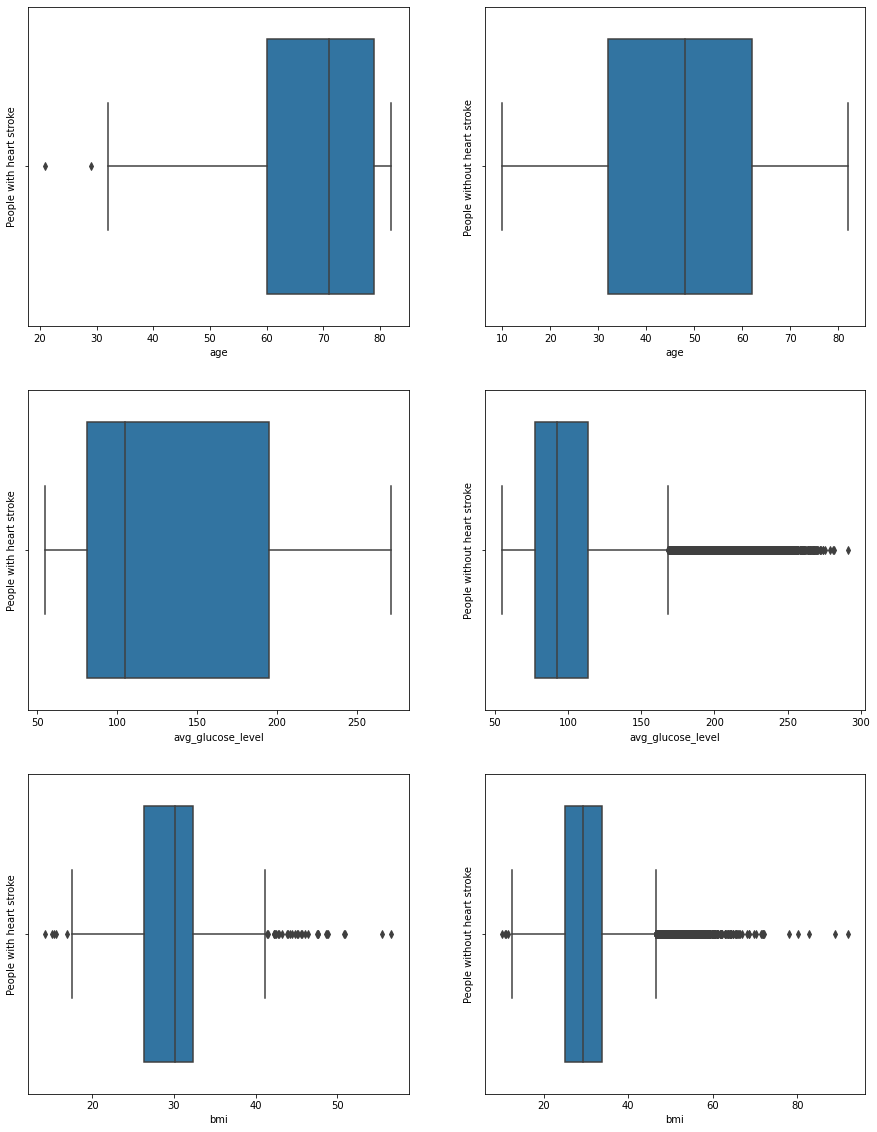

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(15,20))

i=1
j=1

df1=results.loc[results['stroke']==1]
df2=results.loc[results['stroke']==0]

for v in numeric_features:
    if len(results[v].unique())==2:
        continue
    sns.boxplot(data=df1,x=v,ax=axs[i-1][0])
    axs[i-1][0].set_xlabel(v)
    axs[i-1][0].set_ylabel('People with heart stroke')


    sns.boxplot(data=df2,x=v,ax=axs[i-1][1])
    axs[i-1][1].set_xlabel(v)
    axs[i-1][1].set_ylabel('People without heart stroke')

    j+=1
    if j%2==0:
        j=1
        i+=1

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


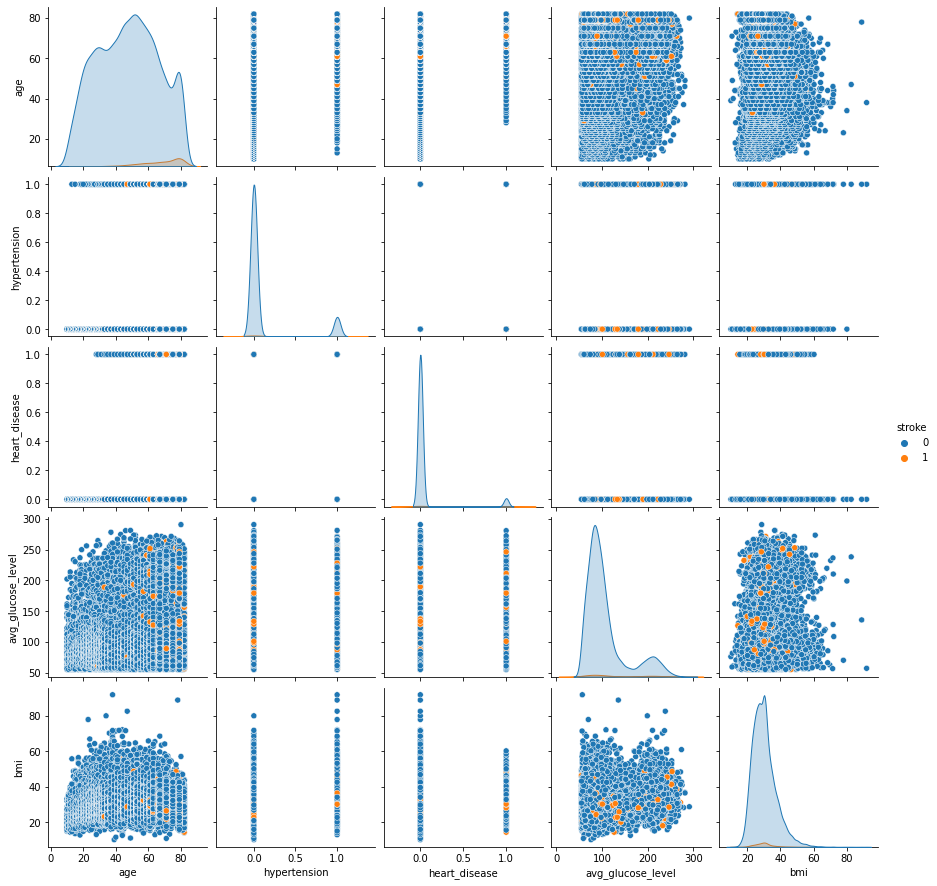

In [28]:
sns.pairplot(results[numeric_features],hue='stroke')

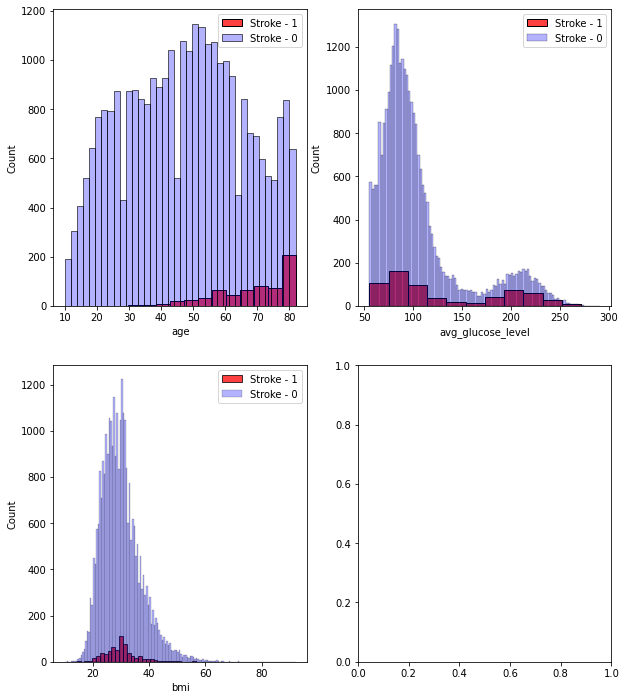

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10,12))

i=1
j=1

for v in numeric_features:
    if len(results[v].unique())==2:
        continue
    sns.histplot(df1[v],ax=axs[i-1][j-1],label='Stroke - 1',color='r')
    
    sns.histplot(df2[v],ax=axs[i-1][j-1],label='Stroke - 0',color='b',alpha=0.3)
    axs[i-1][j-1].set_xlabel(v)
    axs[i-1][j-1].legend()

    j+=1
    if (j+1)%2==0:
        j=1
        i+=1